Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>.

# Gradient Descent

## Contents

- #### What is Gradient Descent
- #### Gradient Descent for Linear Regression
- #### Math
  - ##### Derivaties
  - ##### Partial Derivatives
- #### Gradient Descent for Linear Regression in Python
- #### Stochastic Gradient Descent
- #### Mini-batch Gradient Descent



### What is Gradient Descent

In simple terms, Gradient Descent is an algorithm to **compute the minimum of a function**. OK - So, what is the big deal ? Well, most of the time in most machine learning algorithms, there is always a cost function that needs to be minimized. The best Machine Learning Algorithm is usually the one with the most inclusive and simple cost function. Once a cost function is defined, it is just a matter of solving for a minimum to arrive at the solution. That is why _Gradient Descent_ is extremely useful in the context of Machine learning. Let's see an example.

### Gradient Descent for Linear Regression

Let's start with the simplestML problem - Linear Regression. In the <a href="https://ajaytech.co/machine-learning-in-python/">Machine Learning in Python Tutorial</a>, we have covered <a href="https://ajaytech.co/python-regression/">Regression in Python</a> in great detail. 

Since the problem is simple enough to be solved mathematically, we have used the **OLS** (Ordinary Least Squares) technique to fit a straight line to the Linear Regression problem. You can view the <a href="https://ajaytech.co/python-regression/#Sum-of-Squares">equation for Ordinary Least Square </a> to solve linear regression here. What is the cost function in this case ?

picture here

**Cost function** = Sum of Squares of Residuals

# Cost function =  $\frac{1}{2 \times n} \sum_{i=1}^n {error}^2$ = $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - \hat{y})^2$

The mathematical solution to minimize this cost function as derived by **OLS** is as follows. 

# $m_{slope} = \frac{\sum_{i=1}^n (y-\bar{y}) \times (x-\bar{x})}{ \sum_{i=1}^n (x-\bar{x})^2} $

where $\bar{x}$ represents the average of x and $\bar{y}$ represents the average of y 

However, when the number of independent variables increase, **OLS** is not a good solution. That is where **Gradient Descent** shines. While OLS is an analytical solution, Gradient Descent is a numerical solution. However, to understand _Gradient Descent_, we have to be conversant with the following concepts in Math. 

- Derivatives
- Partial Derivatives

### Math

#### Derivatives

A derivative is the slope of a function. Let's take a simple straight line - 

# $y = 2 \times x$ 

A simple dataset for this could be

- x = Number of DNA Samples
- y = Number of DNA pairs.

Let's plot a sample dataset and try to compute the slope.

x =  [ 1  2  3  4  5  6  7  8  9 10]
y =  [ 2  4  6  8 10 12 14 16 18 20]


Text(3, 3, '2')

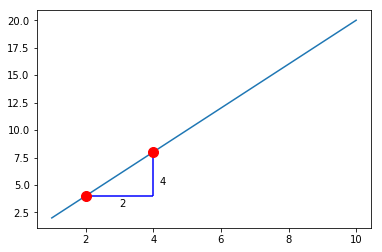

In [61]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = x * 2

print ( "x = ",x)
print ( "y = ",y)

plt.plot(x,y)
plt.plot(x[1], y[1], marker='o', markersize=10, color="red")
plt.plot(x[3], y[3], marker='o', markersize=10, color="red")

plt.hlines(y=y[1], xmin=x[1], xmax=x[3], color='b')
plt.vlines(x=x[3], ymin=y[1], ymax=y[3], color='b')

plt.text(4.2,5,(y[3] - y[1]))
plt.text(3,3,(x[3] - x[1]))

# $slope = \frac {4}{2} = 2$

Mathematically, the slop of the equation $y = 2x$ is defined as

## $\frac{dy}{dx} = \frac {2 x} {x} = 2 $

And that's what you see as the **m** in $y = m x$

How about a second order equation ?

# $y = x^2$

A simple dataset for this could be

- x = Reach of a product
- y = Sales of the product.

Let's plot a sample dataset and try to compute the slope.

x =  [ 1  2  3  4  5  6  7  8  9 10]
y =  [  1   4   9  16  25  36  49  64  81 100]


Text(8.58, 45, 'slope = 14')

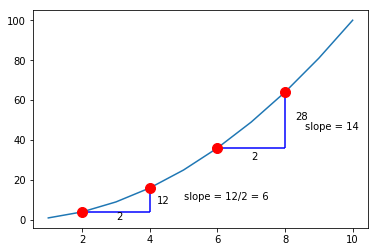

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = x ** 2

print ( "x = ",x)
print ( "y = ",y)

plt.plot(x,y)
plt.plot(x[1], y[1], marker='o', markersize=10, color="red")
plt.plot(x[3], y[3], marker='o', markersize=10, color="red")

plt.hlines(y=y[1], xmin=x[1], xmax=x[3], color='b')
plt.vlines(x=x[3], ymin=y[1], ymax=y[3], color='b')

plt.text(4.2,8,(y[3] - y[1]))
plt.text(3,0.0,(x[3] - x[1]))

plt.text(5,10,"slope = 12/2 = 6")

plt.plot(x[5], y[5], marker='o', markersize=10, color="red")
plt.plot(x[7], y[7], marker='o', markersize=10, color="red")

plt.hlines(y=y[5], xmin=x[5], xmax=x[7], color='b')
plt.vlines(x=x[7], ymin=y[5], ymax=y[7], color='b')

plt.text(8.3,50,(y[7] - y[5]))
plt.text(7,30,(x[7] - x[5]))

plt.text(8.58,45,"slope = 14")

In this case, the slope is not constant as measured by same metric as we have done previously. The slope seems to be changing with x. 

A correct way to define slope (or derivative) is to take an infinitesimally small increase in x and the corresponding value of y and divide them as before. Mathematically, it is defined as,

If $f(x)$ is a function of x, 

# $$\frac{d(f(x))}{dx} = Lim_{dx\to0} \frac{f(x + dx) - f(x)}{dx}$$


For example, if x = 4, increase x by a very small amount, say $\Delta = 0.0001$. Now, let's compute the value of y as well and plug them into the equation above

- $x$ = 4
- $dx$ = 0.0001

## $Lim_{dx\to0} \frac{(4 + 0.0001)^2 - 4^2}{0.0001} = \frac{0.0008}{0.0001} \approx 8 = 2 \times 4 = 2 \times x$

so, the derivative of $f(x) = x^2$ is $2x$ . We have not derived this mathematically - instead, we are trying to understanding with numbers, how a derivative works.

> **Derivative** represents the change in the value of a function with respect to the variable _(with which the derivative is being applied)_

#### Partial Derivatives

Partial derivatives are almost similar to regular derivatives - except that partial derivatives work only on a particular variable. For example, say the speed of a car is dependent on
- engine RPM
- slope of the road

## $speed = 8 \times x_{rpm} + 2 \times y_{slope}$

you can also write it as

## $z = 8x + 2y$

Now, how does the speed ($z$) of the car vary with a unit increase in the engine RPM ? The answer is 8 - pretty straightforward. That is represented mathematically using

## $\frac{\partial z}{\partial x} = \frac{\partial (8x + 2y)}{\partial x} = 8$